In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob

import matplotlib.patches as mpatches


In [2]:
no_re_h_a_1 = np.array(glob.glob('../data/TargettedTesting/StartLater-FirstAttempt/No_Retesting_HCW_After/1/*.txt'))
no_re_h_a_01 = np.array(glob.glob('../data/TargettedTesting/StartLater-FirstAttempt/No_Retesting_HCW_After/0.1/*.txt'))
no_re_no_h = np.array(glob.glob('../data/TargettedTesting/StartLater-FirstAttempt/No_Retesting_No_HCW/*.txt'))
re_no_h = np.array(glob.glob('../data/TargettedTesting/StartLater-FirstAttempt/Yes_Retesting_No_HCW/*.txt'))

print(len(no_re_h_a_1))
print(len(no_re_h_a_01))
print(len(no_re_no_h))
print(len(re_no_h))

220
330
341
220


In [3]:
def plot_graph(all_files,cc,choice):
#     print(all_files[0])
    if cc[0] == 0:
        if(cc[2] == 0):
            clrs = plt.cm.Blues(np.linspace(0.5,1,6))
        elif(cc[2] == 1):
            clrs = plt.cm.Greens(np.linspace(0.5,1,6))
    elif cc[0] == 1:
        if(cc[2] == 0):
            clrs = plt.cm.Reds(np.linspace(0.5,1,6))
        elif(cc[2] == 1):
            clrs = plt.cm.Oranges(np.linspace(0.5,1,6))
    
    
    cases = ["0.1%: Retesting Symtomatics, Not testing HCW", "0.1%: Not Retesting symptomatics, Not testing HCW", "0.1%: Testing HCW after Symptomatics", "1%: Testing HCW after Symptomatic"]
    case_color = ["navy", "darkgoldenrod", "darkgreen", "firebrick"]
    
    
    
    p_0_0 = []
    p_0_1 = []
    p_0_2 = []
    p_0_3 = []
    p_0_4 = []
    p_0_5 = []
    p_0_6 = []
    p_0_7 = []
    p_0_8 = []
    p_0_9 = []
    p_1_0 = []

    p = [p_0_0, p_0_1, p_0_2, p_0_3, p_0_4, p_0_5, p_0_6, p_0_7, p_0_8, p_0_9, p_1_0]
    x_axis = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

#     for i in range(0,len(all_files)):
#         if(all_files[i].split("_")[9]=="0.0"):
#             p_0_0.append(all_files[i])
#         elif(all_files[i].split("_")[9]=="0.1"):
#             p_0_1.append(all_files[i])
#         elif(all_files[i].split("_")[9]=="0.2"):
#             p_0_2.append(all_files[i])
#         elif(all_files[i].split("_")[9]=="0.3"):
#             p_0_3.append(all_files[i])
#         elif(all_files[i].split("_")[9]=="0.4"):
#             p_0_4.append(all_files[i])
#         elif(all_files[i].split("_")[9]=="0.5"):
#             p_0_5.append(all_files[i])
#         elif(all_files[i].split("_")[9]=="0.6"):
#             p_0_6.append(all_files[i])
#         elif(all_files[i].split("_")[9]=="0.7"):
#             p_0_7.append(all_files[i])
#         elif(all_files[i].split("_")[9]=="0.8"):
#             p_0_8.append(all_files[i])
#         elif(all_files[i].split("_")[9]=="0.9"):
#             p_0_9.append(all_files[i])
#         elif(all_files[i].split("_")[9]=="1.0"):
#             p_1_0.append(all_files[i])
    for i in range(0,len(all_files)):
        for j in range(0,len(x_axis)):
            if(all_files[i].split("_")[9]==str(x_axis[j])):
                p[j].append(all_files[i])
    
    data = [[],[],[],[],[],[],[],[],[],[],[]]
    
    cools = ['navy', 'royalblue', 'blue','green','lime','magenta','olive','orange','orangered','maroon','red']

    n_pop = 10000
    
    print("*** Data ***")
    
    for i in range(0,len(data)):
        count = 0
        temp_av = np.zeros(120,float)
        for j in range(0, len(p[i])):
            temp_data = np.genfromtxt(p[i][j],delimiter=" ", comments="#")[-1][4] # Get number of recovered from data
            temp_data += np.genfromtxt(p[i][j],delimiter=" ", comments="#")[-1][2]+np.genfromtxt(p[i][j],delimiter=" ", comments="#")[-1][3]+np.genfromtxt(p[i][j],delimiter=" ", comments="#")[-1][5] # DOING THIS BECAUSE I ONLY PLOTTED TILL 100 days, but infection completely dies out later
            
            all_inf = np.genfromtxt(p[i][j],delimiter=" ", comments="#")[:,2]+np.genfromtxt(p[i][j],delimiter=" ", comments="#")[:,3]+np.genfromtxt(p[i][j],delimiter=" ", comments="#")[:,5]
            tx = np.genfromtxt(p[i][j],delimiter=" ", comments="#")[:,0]
            plt.plot(tx, all_inf/n_pop,'--',alpha=0.2,color=cools[i])
            if(len(temp_av)<len(all_inf)):
                for k in range(0,len(temp_av)):
                    temp_av[k] += all_inf[k]
            else:
                temp_av += all_inf
            count += 1
            data[i].append(temp_data)
#         print("RAT "+str(x_axis[i]*100)+"% "+str(data[i])+" "+ str(len(data[i]))+" runs")
#         plt.yscale('log')
        print(count,end=" ")
        tx = np.linspace(0,120,120)
        temp_av = temp_av/(n_pop*count)
        plt.plot(tx,temp_av,color='red',label="Daily Testing: "+str(all_files[0].split("_")[6])+"% RAT frac:"+str(round(x_axis[i]*100))+"%")
        plt.ylabel("Fraction of Infected")
        plt.xlabel("Time (Days)")
        plt.legend()
#         plt.savefig("../images/Comparing_Sensitivities/Infected Graphs/"+all_files[i].split("_")[0].split("/")[-1]+"_"+"RAT_sens_"+str(all_files[i].split("_")[4])+"_frac"+str(x_axis[i]*100)+".png",facecolor='w')
        plt.show()


    avgs = np.zeros(len(p),float)
    stds = np.zeros(len(p),float)

    

    for i in range(0,len(avgs)):
        if(len(data[i])>0):
            avgs[i] = np.average(data[i])/n_pop
            stds[i] = np.std(data[i])/n_pop
        else:
            avgs[i] = np.nan
            stds[i] = np.nan
    
    if(len(all_files)!=0):
        plt.title("RAT Sensitivity - "+all_files[0].split("_")[8])
    
        plt.xlabel("Percentage of total tests that are RAT (%)")
        plt.ylabel("Asymptotic Fraction Infected")
        #plt.locator_params(nbins = len(labels),axis='x')
    #     plt.xticks(fontsize=20)
    #     plt.yticks(fontsize=20)

    #     plt.plot(x_axis*100, avgs,'-o',color=clrs[0],label=all_files[0].split("_")[2]+"% "+ all_files[i].split("_")[0].split("/")[-1]+" Testing Daily")
        plt.plot(x_axis*100, avgs,'-o',color=case_color[choice],label=cases[choice],alpha=1)#0.7*cc[1])
        plt.errorbar(x_axis*100,avgs,yerr=stds,ls='none',color=case_color[choice],solid_capstyle='projecting', capsize=5,alpha=0.5)
    #     plt.legend()
    #     plt.savefig("../images/Comparing_Sensitivities/"+all_files[i].split("_")[0].split("/")[-1]+"_"+all_files[i].split("_")[1]+all_files[i].split("_")[2]+"_BETA06_.png",dpi=500,facecolor='w')
    #     plt.show()

*** Data ***
20 

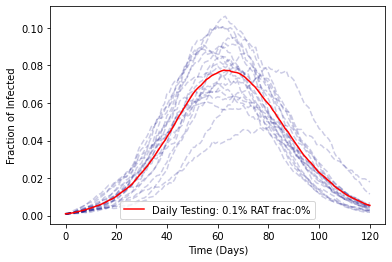

20 

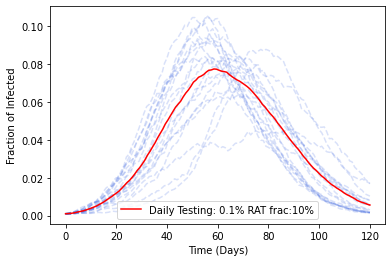

20 

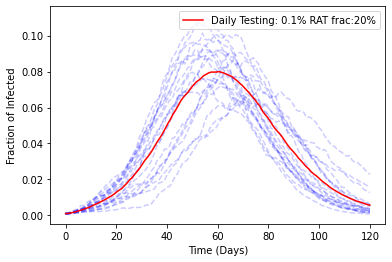

20 

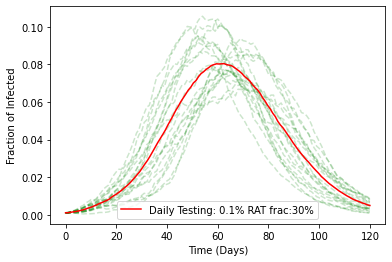

20 

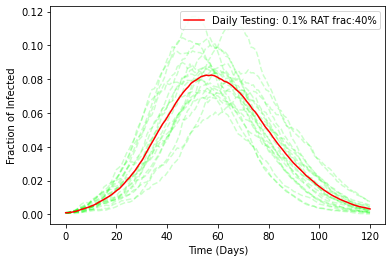

20 

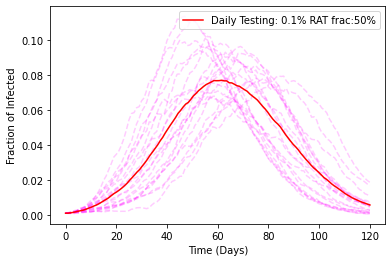

20 

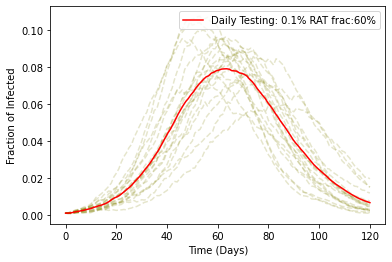

20 

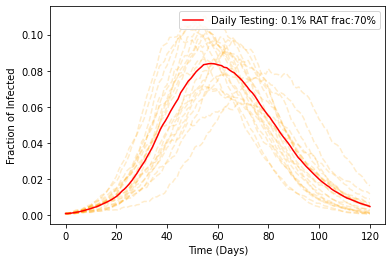

20 

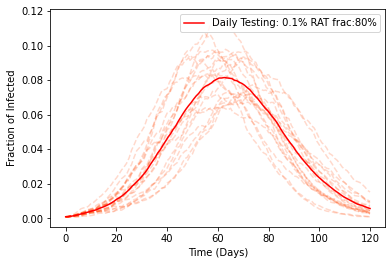

20 

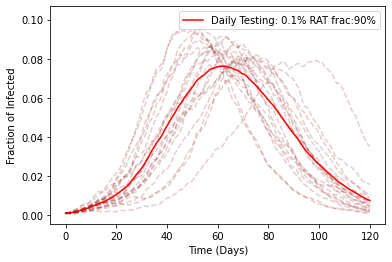

20 

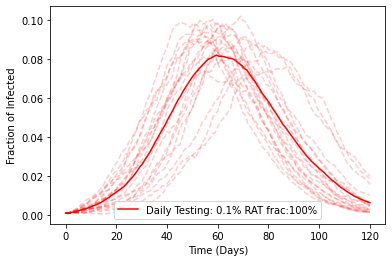

*** Data ***
32 

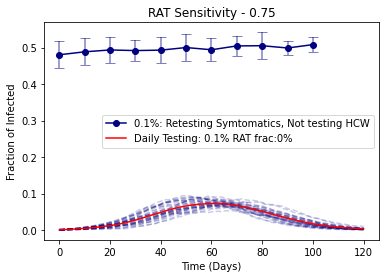

32 

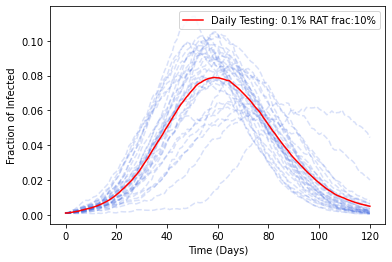

KeyboardInterrupt: 

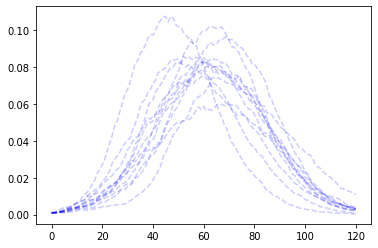

In [4]:
plot_graph(re_no_h,[0,1,0],0)
# plt.legend()
# plt.show()
plot_graph(no_re_no_h,[0,1,1],1)
# plt.legend()
# plt.show()
plot_graph(no_re_h_a_01,[0,1,1],2)
# plt.legend()
# plt.show()
plot_graph(no_re_h_a_1,[0,1,1],3)
plt.legend()

plt.savefig("../images/Starting Testing Late/All.png",facecolor='w',dpi=100)
plt.show()

In [ ]:
..

In [ ]:
# plot_graph(random_txt_files,['dodgerblue','tomato'])
# plot_graph(targetted_txt_files,['lightseagreen','tomato'])

plot_graph(re_no_h,[0,1,1],0)
plt.legend()

In [ ]:
## NO RETESTING NO TESTING HEALTHCARE
plot_graph(no_re_no_h,[0,1,0],1)
plt.legend()

*** Data ***
30 

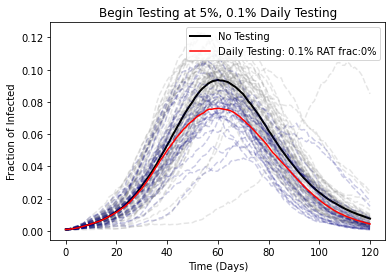

30 

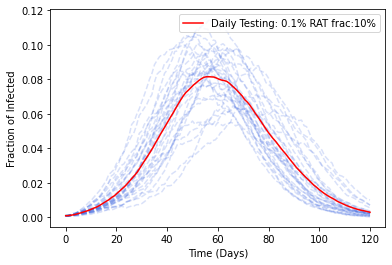

30 

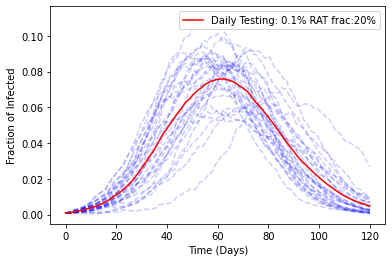

30 

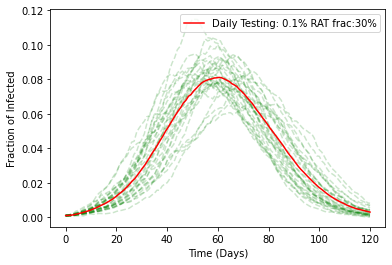

30 

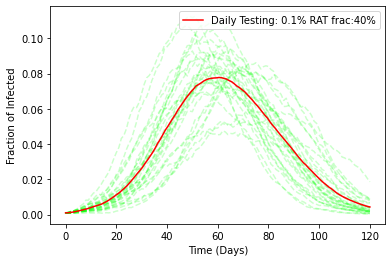

30 

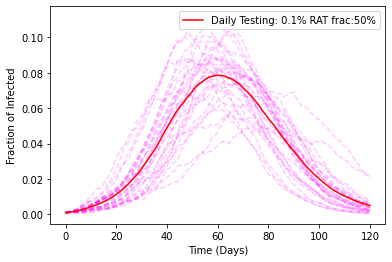

30 

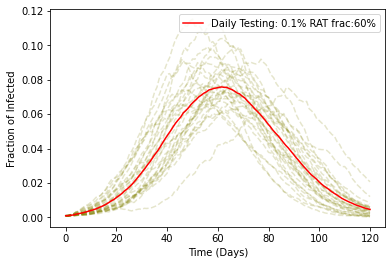

30 

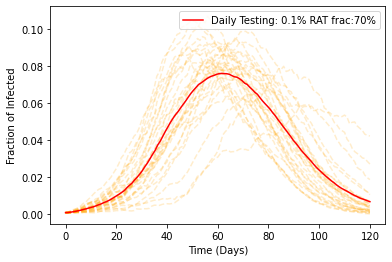

30 

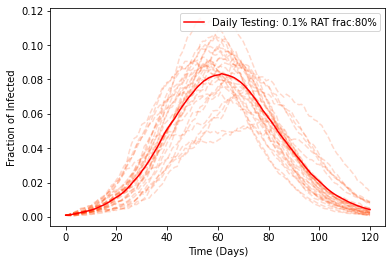

30 

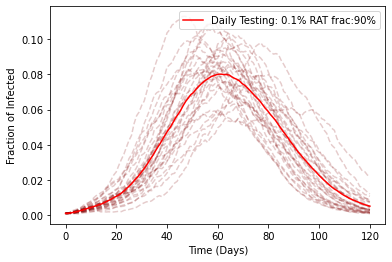

30 

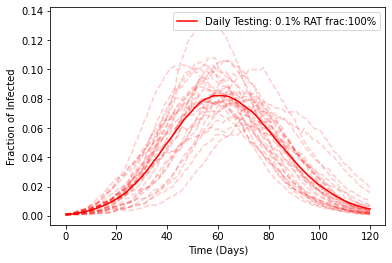

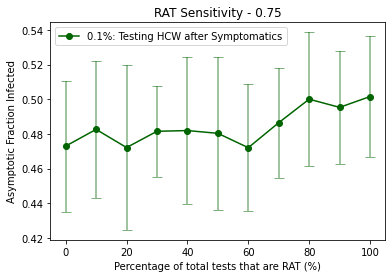

In [10]:
# NO RETESTING HCW TESTED BEFORE


# Get full run Data
avg_data = np.zeros((121,9),float)
full_run = np.array(glob.glob('../data/RandomTesting/Full Run (4th October)/Random_Testing_0_*.txt'))

plt.title("Begin Testing at 5%, 0.1% Daily Testing")

for i in range(0,len(full_run)):
    temp_data = np.genfromtxt(full_run[i],delimiter=" ",comments="#")
    plt.plot(temp_data[:,0],(temp_data[:,2]+temp_data[:,3]+temp_data[:,5])/10000,'--',color='gray',alpha=0.2)
    avg_data += temp_data

avg_data = avg_data/len(full_run)

plt.plot(avg_data[:,0],(avg_data[:,2]+avg_data[:,3]+avg_data[:,5])/10000,linewidth=2,color='black',label="No Testing")

plot_graph(no_re_h_a_01,[0,1,1],2)
plt.legend()

*** Data ***
20 

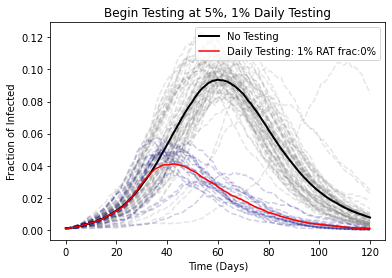

20 

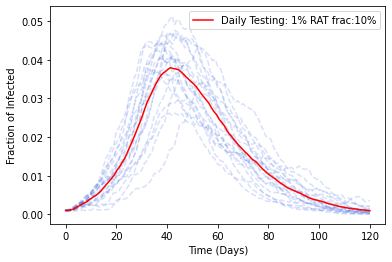

20 

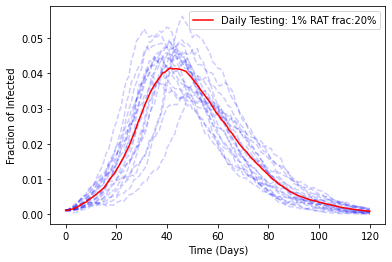

20 

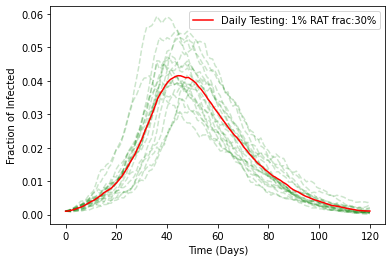

20 

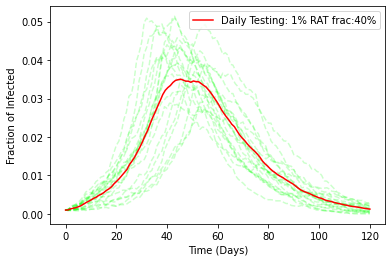

20 

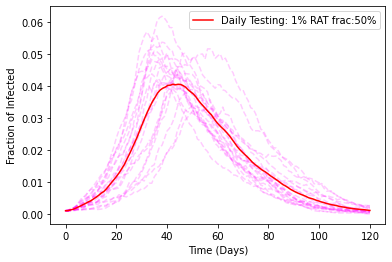

20 

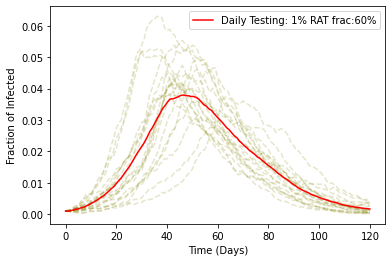

20 

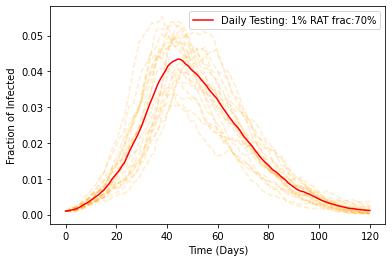

20 

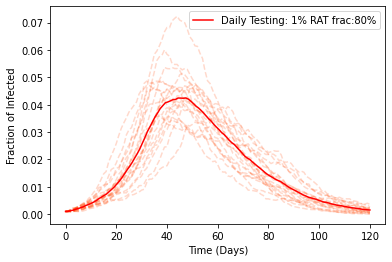

20 

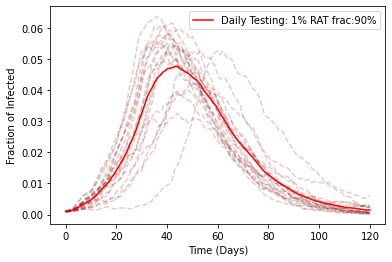

20 

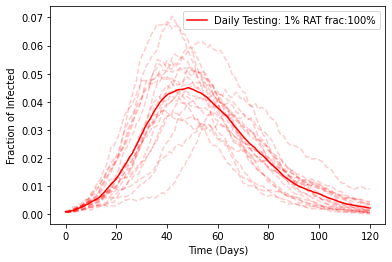

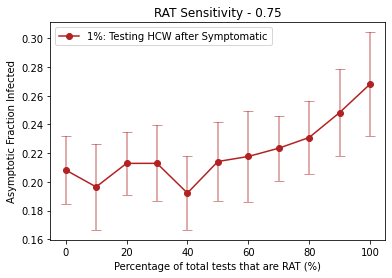

In [9]:
# NO RETESTING, HCW TESTING AFTER

avg_data = np.zeros((121,9),float)
full_run = np.array(glob.glob('../data/RandomTesting/Full Run (4th October)/Random_Testing_0_*.txt'))

plt.title("Begin Testing at 5%, 1% Daily Testing")
for i in range(0,len(full_run)):
    temp_data = np.genfromtxt(full_run[i],delimiter=" ",comments="#")
    plt.plot(temp_data[:,0],(temp_data[:,2]+temp_data[:,3]+temp_data[:,5])/10000,'--',color='gray',alpha=0.2)
    avg_data += temp_data

avg_data = avg_data/len(full_run)

plt.plot(avg_data[:,0],(avg_data[:,2]+avg_data[:,3]+avg_data[:,5])/10000,linewidth=2,color='black',label="No Testing")
# plt.plot(avg_data[:,0],(avg_data[:,2]+avg_data[:,3]+avg_data[:,5])/5850,linewidth=2,color='black',label="No Testing")

plot_graph(no_re_h_a_1,[0,1,0],3)
plt.legend()